CRYPTOCURRENCY PERFORMANCE - Overview
 
-Source data: Yahoo finance
-Time period: 2 years YTD
-Author: Piotr Zawodnik

ANALYSIS SUMMARY (2 years: June_20 to June_22)

1/ Among the top 5 market cap. cryptocurrencies, prices extremely vary. The highest recorded closed price for Bitcoin (BTC) occurred on 21-11-08 at a price of 67 566 dollars with Ripple only at $ 1.8 per coin at its top trading value.

2/ The highest % growth during this period was noted by Solana currency with a starting price of 0.7 dollar, ending with 38 $ (+5300 % growth) - which is due to the fact that Solana is new on the market. All cryptocurrencies experienced solid growth, ranging from Ripple's 77% to Solana's exceptional price hike.

3/ Strong cryptocurrencies growth, however, came to an end with a continuous declining pattern that started on Nov/Dec-22. The downturn affected all cryptocurrencies similarly, as there is a robust positive correlation between all cryptos. Especially between BTC/ETH 0.88, ETH/Solana 0.88 and ETH/Cardano 0.88 and Ripple 0.86.

4/ 2 years (730 days) positive returns were burdened with a large dose of risk measured by std deviation with the riskiest crypto Solana at 0.084 std and Ripple at 0.071 std. For Solana, there were more than 100 days with negative day-to-day returns between -10% to -5% drop per day, and more than 30 with a drop between -25% and -10%. For all currencies, decline intensifies after Nov/Dec-22.


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data

#Visual
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# SELECT TIME PERIOD

start = dt.datetime(2020,6,23)   # 2 YEARS data
end = dt.datetime(2022,6,22)

In [3]:
# GET DATA FROM YAHOO FINANCE FOR TOP 5 MARKET CAP. CRYPTO CURRENCIES:
Bitcoin = data.DataReader('BTC-USD','yahoo',start,end)

Ethereum = data.DataReader('ETH-USD','yahoo',start,end)

Ripple = data.DataReader('XRP-USD','yahoo',start,end)

Cardano = data.DataReader('ADA-USD','yahoo',start,end)   

Solana = data.DataReader('SOL-USD','yahoo',start,end)   


In [4]:
# FILTER DATA ONLY to CLOSED PRICE and VOLUME columns
BTC = Bitcoin[["Close", "Volume"]]
ETH = Ethereum[["Close", "Volume"]]
Ripple = Ripple[["Close", "Volume"]]
Cardano = Cardano[["Close", "Volume"]]
Solana = Solana[["Close", "Volume"]]

In [5]:
# CONCATENATE: COMBINED TABLES
tickers = ["BTC", "ETH", "Ripple", "Cardano", "Solana"]  #list of crypto tickers
crypto = pd.concat([BTC,ETH,Ripple,Cardano,Solana], axis = 1, keys = tickers)  #Combine cryptocurrencies, add each with a column
crypto.columns.names = ['Ticker', 'Info']    #name columns

In [6]:
crypto.head(3).round(2)

Ticker          BTC                  ETH             Ripple              \
Info          Close       Volume   Close      Volume  Close      Volume   
Date                                                                      
2020-06-23  9629.66  17006433272  244.14  6624530348   0.19  1093605185   
2020-06-24  9313.61  18961716076  235.77  8815030025   0.18  1138044691   
2020-06-25  9264.81  18616048626  232.94  7010426122   0.18  1055030012   

Ticker     Cardano            Solana           
Info         Close     Volume  Close   Volume  
Date                                           
2020-06-23    0.08  184078790   0.71  1327340  
2020-06-24    0.08  302220209   0.74  2769054  
2020-06-25    0.08  207010908   0.71  1751581

Data preparation: adding Year/Month/Period columns

In [7]:
# FROM Date index create separate Year, Month, Period YY_MM columns
crypto.insert(0, "Year", crypto.index.year)

In [8]:
crypto.insert(1, "Month", crypto.index.month)

In [9]:
# convert integer value into string
crypto["Year"] = crypto["Year"].astype(str)
crypto["Month"] = crypto["Month"].astype(str)
#Create Period column - YYYY_MM
crypto.insert(2, "Period", value = crypto['Year'].astype(str) +  "-" + crypto['Month'].astype(str))

In [10]:
crypto.head(3)

Ticker      Year Month  Period          BTC                      ETH  \
Info                                  Close       Volume       Close   
Date                                                                   
2020-06-23  2020     6  2020-6  9629.658203  17006433272  244.142151   
2020-06-24  2020     6  2020-6  9313.610352  18961716076  235.772461   
2020-06-25  2020     6  2020-6  9264.813477  18616048626  232.944489   

Ticker                    Ripple               Cardano               Solana  \
Info            Volume     Close      Volume     Close     Volume     Close   
Date                                                                          
2020-06-23  6624530348  0.188680  1093605185  0.082950  184078790  0.708297   
2020-06-24  8815030025  0.184272  1138044691  0.082583  302220209  0.736994   
2020-06-25  7010426122  0.183570  1055030012  0.081691  207010908  0.713194   

Ticker               
Info         Volume  
Date                 
2020-06-23  1327340  
2020-06-24  2769054  
2020-06-25  1751581

#### I. Pricing analysis - max and min performance

The maximum trading value for each cryptocurrency and its date.

In [11]:
#For each ticker find a maximum price and time when it happened. 
for tick in tickers:
    print(tick,crypto[tick]['Close'].round(1).max())
    print(crypto[tick]['Close'].round(1).idxmax())

BTC 67566.8
2021-11-08 00:00:00
ETH 4812.1
2021-11-08 00:00:00
Ripple 1.8
2021-04-13 00:00:00
Cardano 3.0
2021-09-02 00:00:00
Solana 258.9
2021-11-06 00:00:00


The minimum trading value for each cryptocurrency and its date.

In [12]:
# Same for minimum price
for tick in tickers:
    print(tick,crypto[tick]['Close'].round(1).min())
    print(crypto[tick]['Close'].round(1).idxmin())

BTC 9045.4
2020-06-27 00:00:00
ETH 223.0
2020-06-27 00:00:00
Ripple 0.2
2020-06-23 00:00:00
Cardano 0.1
2020-06-23 00:00:00
Solana 0.7
2020-06-23 00:00:00


Price change in $ value between highest and lowest price point. 

In [13]:
# Change in max / min price $. 
for tick in tickers:
    print(tick,crypto[tick]['Close'].round(1).max() - crypto[tick]['Close'].round(1).min())

BTC 58521.4
ETH 4589.1
Ripple 1.6
Cardano 2.9
Solana 258.2


#### II. Daily Returns % - price volatility

In [14]:
# Create a new dataframe for % daily returns on stock price. 

#pct_change() formula calculates per each row close price to previous day price
#ex. 20.12 closed price $11K, 20.11 - $10K, value 0.1 (+10% daily)
returns = pd.DataFrame()

for tick in tickers:
    returns[tick] = crypto[tick]['Close'].pct_change()

In [15]:
returns.head(3)

,BTC,ETH,Ripple,Cardano,Solana
Date,,,,,
2020-06-23,NaN,NaN,NaN,NaN,NaN
2020-06-24,-0.032820,-0.034282,-0.023362,-0.004424,0.040516
2020-06-25,-0.005239,-0.011994,-0.003810,-0.010801,-0.032293


In [16]:
#DATA CLEANING:
# 1 Clean first row with NaN values as no % change in the first month
returns.dropna(how = "all", inplace = True)
returns.head(3)

,BTC,ETH,Ripple,Cardano,Solana
Date,,,,,
2020-06-24,-0.032820,-0.034282,-0.023362,-0.004424,0.040516
2020-06-25,-0.005239,-0.011994,-0.003810,-0.010801,-0.032293
2020-06-26,-0.010998,-0.014065,-0.004897,-0.013833,0.039190


Text(0.5, 1.0, 'Price volatility - Bitcoin')

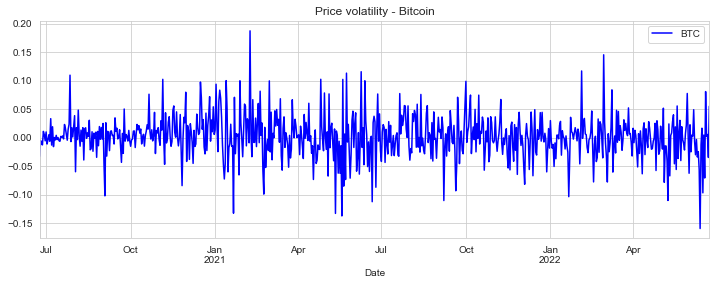

In [18]:
# Daily % price returns on plot chart - Bitcoin's volatility

returns["BTC"].plot(label = "BTC", figsize = (12,4), color = "blue")
plt.legend()
plt.title('Price volatility - Bitcoin')

In [19]:
# Create simple trend function to recognize UP/DOWN trend behaviour. 

def trend(change):
    if change == 0:
        return 'no change'
    elif change > 0:
        return "Up_trend"
    elif change < 0:
        return "Down_trend"
    else:
        return "other"

In [20]:
# Apply TREND function to check number of UP/DOWN day events. 
returns["BTC"].apply(trend).value_counts()
#(optional%) returns["BTC"].apply(trend).value_counts(normalize= True).round(2)

Up_trend      387
Down_trend    343
Name: BTC, dtype: int64

In [24]:
# Create decline_performance: more in depth downside overview. 
def decline_performance(change):
    if change < -0.25:
        return "more than -25%"
    elif (change >= -0.25 and change <= -0.1):
        return "[-10% to -25%]"
    elif (change > -0.1 and change <= -0.05):
        return "[-5% to -10%)"
    elif (change > -0.05 and change < 0):
        return "(0 to -5%)"
    else:
        return "Up_trend"

In [25]:
returns["BTC"].apply(decline_performance).value_counts()

Up_trend          387
(0 to -5%)        287
[-5% to -10%)      47
[-10% to -25%]      9
Name: BTC, dtype: int64

<AxesSubplot:title={'center':'Daily closed price volatility'}, ylabel='BTC'>

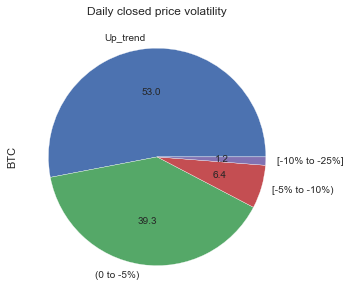

In [28]:
#Decline Performance - Pie chart

# plt.style.available
plt.style.use("seaborn")
plt.title("Daily closed price volatility")
returns["BTC"].apply(decline_performance).value_counts().plot(kind = "pie", 
autopct="%.1f",figsize=(5,5))

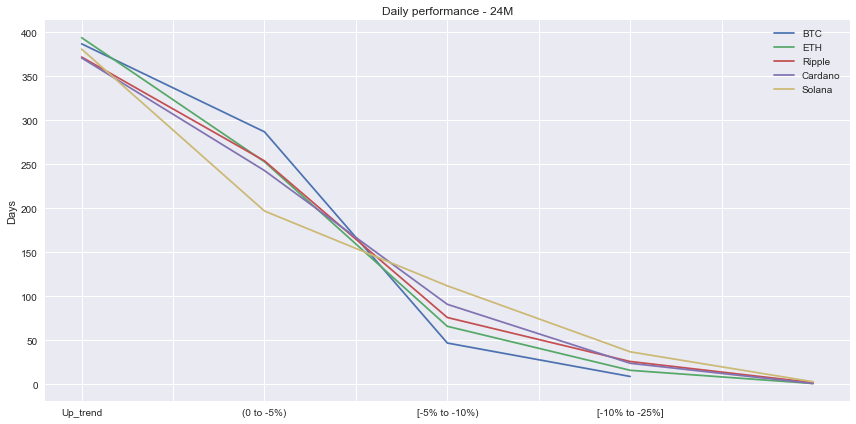

In [29]:
# DECLINE PERFORMANCE - All crypto view 

for tick in tickers:
    returns[tick].apply(decline_performance).value_counts().plot(label=tick, 
    ylabel = "Days",figsize = (12,6), )
plt.legend()
plt.title("Daily performance - 24M")
plt.tight_layout()

Data output:  Solana crypto has the most days with negative daily swings ranging from -5% to -25%. 

In [30]:
# RISK measured by standard devation. 
returns.std().sort_values(ascending = False)
#comm: The highest standard devation = highest risk. Solana is the riskiest curr.

Solana     0.084086
Ripple     0.071160
Cardano    0.062706
ETH        0.050078
BTC        0.037862
dtype: float64

#### III. CLOSE PRICE / VOLUME TRENDS

Text(0.5, 1.0, 'Closed price - 24M trend')

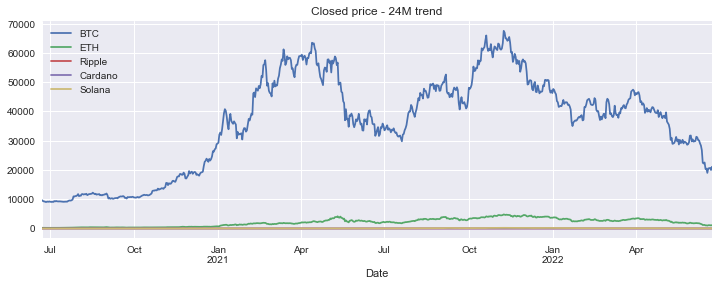

In [31]:
#Closed price for all crypto for the entire time period.
for tick in tickers:
    crypto[tick]['Close'].plot(label=tick, figsize = (12,4), )
plt.legend()
plt.title("Closed price - 24M trend")

#! All 5 crypto prices on 1 chart are distorted due to Bitcoin value. 

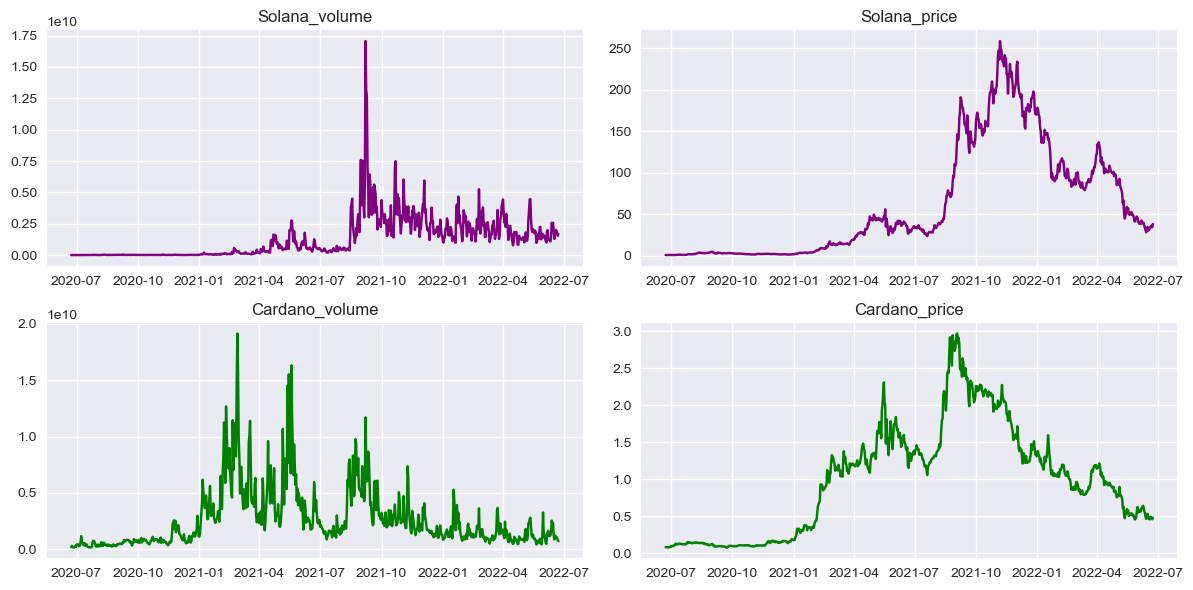

In [32]:
#Solana price/volumes VS Cardano price/volumes

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 6), dpi=100)
axes[0][0].plot(Solana["Volume"], color = 'purple' )
axes[0][0].set_title("Solana_volume")

axes[0][1].plot(Solana["Close"], color = 'purple')
axes[0][1].set_title("Solana_price")

axes[1][0].plot(Cardano["Volume"] , color = "green")
axes[1][0].set_title("Cardano_volume")

axes[1][1].plot(Cardano["Close"], color = "green")
axes[1][1].set_title("Cardano_price")

plt.tight_layout()

Data output: Solana' pricing trend highly correlated with Cardano. Volume activity permanently decreasing especialy for Cardano urrency since volume peak on 2021-02.

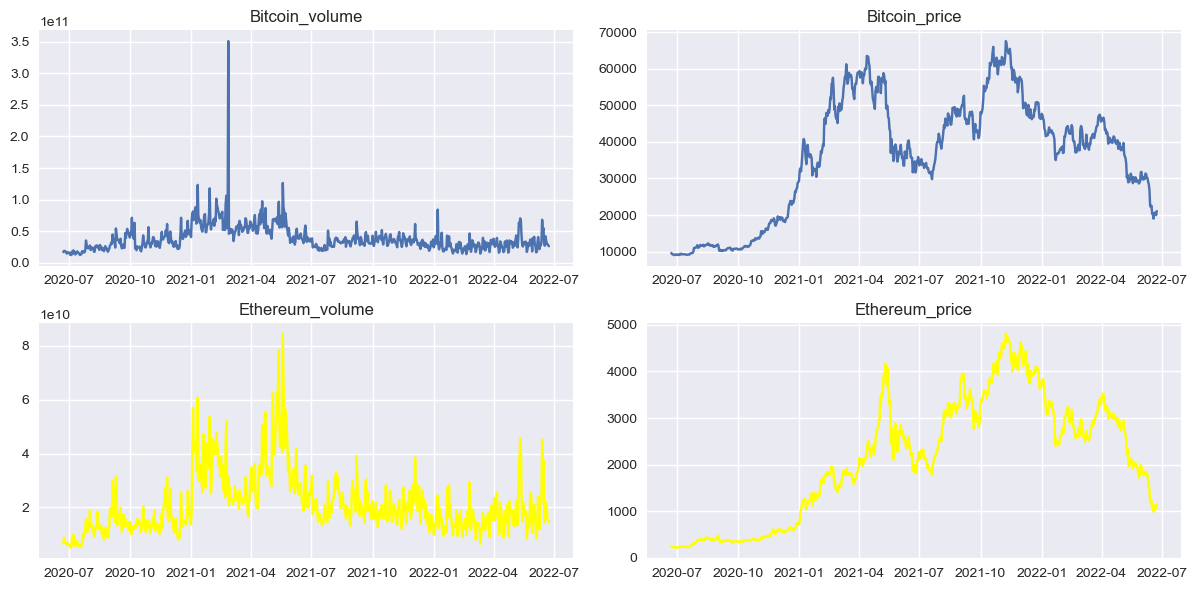

In [33]:
#Bitcoin price/volumes VS Ethereum price/volumes

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 6), dpi=100)
axes[0][0].plot(BTC["Volume"] )
axes[0][0].set_title("Bitcoin_volume")

axes[0][1].plot(BTC["Close"])
axes[0][1].set_title("Bitcoin_price")

axes[1][0].plot(ETH["Volume"] , color = "yellow")
axes[1][0].set_title("Ethereum_volume")

axes[1][1].plot(ETH["Close"], color = "yellow")
axes[1][1].set_title("Ethereum_price")

plt.tight_layout()

Data output: Ethereum price trend is extremely correlated with Bitcoin

#### IV. Correlation analysis

<AxesSubplot:title={'center':'Correlation between crypto currencies'}, xlabel='Ticker', ylabel='Ticker'>

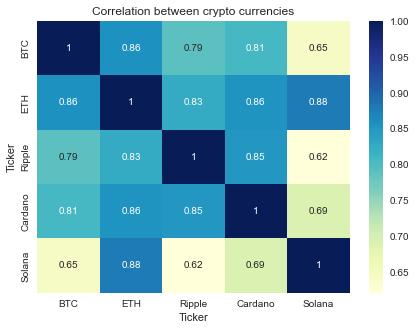

In [35]:
# Correlation analysis - Heat map

plt.figure(figsize=(7, 5))
plt.title("Correlation between crypto currencies")
sns.heatmap(crypto.xs(key='Close',axis=1,level='Info').corr(),annot=True, 
            cmap="YlGnBu")

Data output: All cryptocurrencies are extremely correlated with each other. ETH with BTC 0.86. Solana price is correlated with ETH, less with BTC


#### V. Investment returns from cryptocurrencies' price appreciation (June 20 to June 22 (2 years)) 

In [36]:
# CREATE GROWTH RETURNS from end date period iloc[-1] to start period iloc[0]

# ex. compare end date for BTC: BTC["Close"].iloc[-1] to start date
# BTC["Close"].iloc[0]

b = (((BTC["Close"].iloc[-1] / BTC["Close"].iloc[0]) -1) *100).round(2)
e = (((ETH["Close"].iloc[-1] / ETH["Close"].iloc[0]) -1) *100).round(2)
r = (((Ripple["Close"].iloc[-1] / Ripple["Close"].iloc[0]) -1) *100).round(2)
c = (((Cardano["Close"].iloc[-1] / Cardano["Close"].iloc[0]) -1) *100).round(2)
s = (((Solana["Close"].iloc[-1] / Solana["Close"].iloc[0]) -1) *100).round(2)

In [37]:
End_returns = pd.DataFrame([b,e,r,c,s], ["BTC","ETH","Ripple","Cardano","Solana"], 
                           columns = ["End to Start date % growth"])


In [38]:
End_returns
#End_returns represent final price growth from start date to end date.

,End to Start date % growth
BTC,118.97
ETH,368.33
Ripple,77.83
Cardano,479.01
Solana,5289.72
